In [1]:
import torch
from PIL import Image
import pandas as pd
import numpy as np

In [2]:
def viewImage(img_id):
    #change the path if you want to see images from the test_imagery folder
    filename = "data/imagery/" + img_id + ".jpg"
    image = Image.open(filename).convert("RGB")
    display(image)

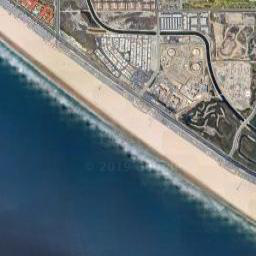

In [3]:
viewImage("14_2822_6564")

In [4]:
def get_coordinates(img_id):
    """
    for an img_id "14_{x coordinates}_{y coordinates}"
    
    returns ints of the x and y coordinates
    """
    segments = img_id.split("_")
    return (int(segments[0]), int(segments[1]))

In [5]:
get_coordinates("14_2822_6564")

(14, 2822)

In [6]:
tax_returns = pd.read_csv('data/16zpallnoagi.csv')

In [7]:
tax_returns.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,0,2016530,825680,748830,402320,1140180,4065690,...,1458270,14219765,23560,40254,28280,89091,358370,1683323,1583690,4690385
1,1,AL,35004,0,5210,2150,2140,830,2470,10510,...,4140,28671,0,0,30,20,930,3022,4130,11001
2,1,AL,35005,0,3100,1340,890,830,1740,6020,...,2180,9262,0,0,0,0,430,860,2600,7364
3,1,AL,35006,0,1200,430,600,170,790,2560,...,910,4982,0,0,0,0,180,315,1010,2873
4,1,AL,35007,0,11940,4770,5140,1750,5450,24950,...,9340,75822,90,79,90,83,2590,9648,8950,23317


In [8]:
income_by_zip = tax_returns[['ZIPCODE', 'A02650']]

In [9]:
income_by_zip.head()

,ZIPCODE,A02650
0,0,115806207
1,35004,290260
2,35005,121690
3,35006,57418
4,35007,697882


In [10]:
zips = pd.read_csv('data/ziplatlon.csv', sep=';')

In [11]:
zips.head()

,zip,city,state,latitude,longitude,timezone,dst,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483,-94.39398"
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351,-92.16056"
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847,-94.74357"
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754"
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129,-91.98027"


In [12]:
income_by_zip.rename(columns={'ZIPCODE': 'zip', 'A02650': 'total_income'}, inplace=True)

/Users/ZanderL/miniconda3/envs/income_pred_env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
income_by_zip

,zip,total_income
0,0,115806207
1,35004,290260
2,35005,121690
3,35006,57418
4,35007,697882
...,...,...
29969,83126,10687
29970,83127,109088
29971,83128,88463
29972,83414,44409


In [14]:
# add total zip code income to zip
zips = zips.merge(income_by_zip, on='zip', how='left')

In [15]:
zips

,zip,city,state,latitude,longitude,timezone,dst,geopoint,total_income
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483,-94.39398",24100.0
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351,-92.16056",17447.0
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847,-94.74357",47146.0
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754",NaN
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129,-91.98027",21583.0
...,...,...,...,...,...,...,...,...,...
43186,66860,Madison,KS,38.126728,-96.16635,-6,1,"38.126728,-96.16635",26273.0
43187,59602,Helena,MT,46.696501,-111.96895,-7,1,"46.696501,-111.96895",791650.0
43188,16063,Zelienople,PA,40.783001,-80.13343,-5,1,"40.783001,-80.13343",263631.0
43189,18913,Carversville,PA,40.376499,-75.04129,-5,1,"40.376499,-75.04129",54446.0


In [16]:
#next step: implementing the algorithm specified in the instructions where each tile is 
#given its zip code.


In [ ]:
#Also, how are we supposed to find the population of a zip code?